# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
df = pd.read_csv('data/ames.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

In [6]:
import seaborn as sns

sns.set_theme()

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

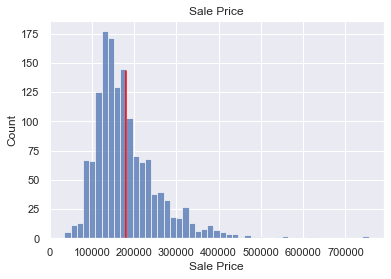

In [18]:
fig, ax = plt.subplots()

sns.histplot(data=df, x='SalePrice', ax=ax)

ax.set_title('Sale Price')
ax.set_xlabel('Sale Price')
ax.axvline(
    x=df['SalePrice'].mean(),
    ymin = 0,
    ymax = 0.77,
    c='red'
);

Now, print out the mean, median, and standard deviation:

In [27]:
saleprice_mean = round(df['SalePrice'].mean(), 2)
saleprice_median = round(df['SalePrice'].median(),2)
saleprice_stddv = round(df['SalePrice'].std(), 2)

print(f'The mean sale price is ${saleprice_mean}.')
print(f'The median sale price is ${saleprice_median}.')
print(f'The standard deviation in sale price is ${saleprice_stddv}.')

The mean sale price is $180921.2.
The median sale price is $163000.0.
The standard deviation in sale price is $79442.5.


In the cell below, interpret the above information.

### Analysis of the Distribution of Sale Price

The distribution of sale prices in this data set is skewed left. Half of all houses sold for less than \\$163,000, but the mean sale price is approximately \\$20,000 greater at \\$180,921.20. There are many houses that sold for prices greater than the mean, but the sales prices of these houses range from \\$200,000 to over three quarters of a million, with no particular subrange commanding a share of the sales prices in the same way that many houses that sold for less than the mean have a sales price between approximately \\$150,000 and \\$180,000. I would be curious to see a box plot of these sales prices, and I would also consider removing the outlier with a sales price close to three quarters of a million.

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

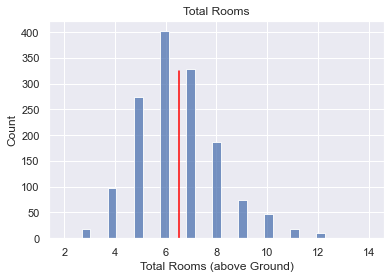

In [29]:
fig, ax = plt.subplots()

sns.histplot(data=df, x='TotRmsAbvGrd', ax=ax)

ax.set_title('Total Rooms')
ax.set_xlabel('Total Rooms (above Ground)')
ax.axvline(
    x=df['TotRmsAbvGrd'].mean(),
    ymin = 0,
    ymax = 0.77,
    c='red'
);

Now, print out the mean, median, and standard deviation:

In [32]:
no_rooms_mean = df['TotRmsAbvGrd'].mean()
no_rooms_median = df['TotRmsAbvGrd'].median()
no_rooms_stddv = df['TotRmsAbvGrd'].std()

print(f'The mean number of rooms is {no_rooms_mean}.')
print(f'The median number of rooms is {no_rooms_median}.')
print(f'The standard deviation in number of rooms is {no_rooms_stddv}.')

The mean number of rooms is 6.517808219178082.
The median number of rooms is 6.0.
The standard deviation in number of rooms is 1.6253932905840505.


In the cell below, interpret the above information.

### Analysis of the Distribution of Number of Rooms

The number of rooms is fairly evenly distributed around the mean number of rooms. The median is lower than the mean by half of a room, indicating that the right tail is slightly longer than the left, but only slightly. (This correlates with the distribution we saw in the sale price of houses in the data set, if we assume that increases in price correlate to number of rooms in the house at some level. There are some houses that sold for significantly more than the rest, and based on what I know about houses, these houses may have significantly more rooms than the others. However, I could be wrong about this.) Based on the distribution, it appears that the majority of houses sold had between 6.5 - 1.5 and 6.5 + 1.5 rooms, that is, between 5 and 8 rooms.

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

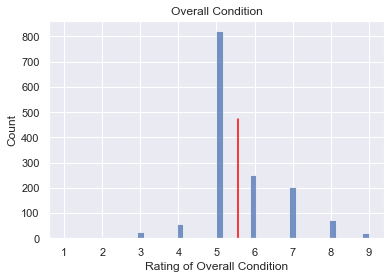

In [37]:
fig, ax = plt.subplots()

sns.histplot(data=df, x='OverallCond', ax=ax)

ax.set_title('Overall Condition')
ax.set_xlabel('Rating of Overall Condition')
ax.axvline(
    x=df['OverallCond'].mean(),
    ymin = 0,
    ymax = 0.55,
    c='red'
);

Now, print out the mean, median, and standard deviation:

In [38]:
condition_mean = df['OverallCond'].mean()
condition_median = df['OverallCond'].median()
condition_stddv = df['OverallCond'].std()

print(f'The mean condition rating is {condition_mean}.')
print(f'The median condition rating is {condition_median}.')
print(f'The standard deviation in condition rating is {condition_stddv}.')

The mean condition rating is 5.575342465753424.
The median condition rating is 5.0.
The standard deviation in condition rating is 1.1127993367127316.


In the cell below, interpret the above information.

### Analysis of Distribution of Overall Condition

The condition of each house is described using a rating system of integers from 1 to 10. The mean and the median are within 0.6 points of each other, and the standard deviation is small (essentially 1 point), indicating that most houses had a condition rating around 5 or 6. From the histogram, we see that the largest number of houses had a rating of 5. The next most common rating doesn't even compare, with the number of houses receiving a rating of 6, 7 or 8 combined being roughly equal to the number of houses that received a rating of 5. Ratings of 6 and 7 are two or three times as common as a rating of 8.

I am surprised to see that the mean and median condition are so low, with so little variation, and I wonder how the rating was determined. I am curious to see how this affects sale price, and I would honestly be curious to investigate, as a potential property owner, what the outlay to keep a property in good condition is through the years, and whether the increase in sale price due to this effort (if any) is worth the cost to maintain that condition. Are there other tangible benefits to this upkeep that could justify the cost, or does keeping your home in good condition purely provide psychological benefits to the resident?

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [48]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [49]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

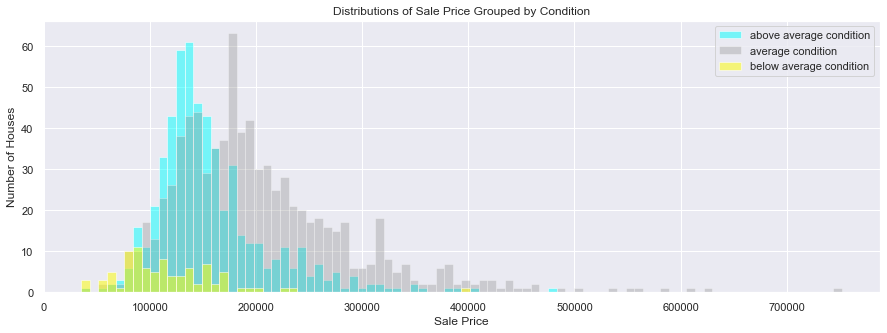

In [50]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

### Interpretation of Sale Price Grouped by Condition

Very few houses in below average condition were sold. The distribution of sale price for below average condition homes is almost flat, with small tails, and the mean sale price appears to be maybe \$25,000 less than the mean sale price of above average condition homes. Suprisingly, houses in **average** condition generally sold for higher prices than houses in **above average** condition. The data we have explored so far does not explain this trend. My first guess is that, homeowners who take extremely good care of their homes may buy smaller, more practical homes so that they can care for them properly, thus resulting in a lower property value based on size. However, more analysis (and possibly research) is needed to provide support for or disprove my guess.

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [78]:
correlations = []

for column in df.columns:
    if column == 'SalePrice':
        continue
    else:
        try:
            correlations.append(df[column].corr(df['SalePrice']))
        except:
            correlations.append(0)
        
max_corr = max(correlations)
# check: only one column with max correlation to Sale Price?
correlations.count(max_corr)
idx_max_corr = correlations.index(max_corr)
feature_w_max_corr_w_SalePrice = df.columns[idx_max_corr]

print(f'''The feature that is most positively correlated with sale price is {feature_w_max_corr_w_SalePrice}. The Pearson
    correlation coefficient for {feature_w_max_corr_w_SalePrice} and SalePrice is {max_corr}.''')

The feature that is most positively correlated with sale price is OverallQual. The Pearson
    correlation coefficient for OverallQual and SalePrice is 0.7909816005838052.


Now, find the ***most negatively correlated*** column:

In [84]:
correlations = []

for column in df.columns:
    # This if conditional is not needed, but easier to leave from last code rather than re-tab everything.
    if column == 'SalePrice':
        continue
    else:
        try:
            correlations.append(df[column].corr(df['SalePrice']))
        except:
            correlations.append(0)
        
min_corr = min(correlations)
# check: only one column with min correlation to Sale Price?
correlations.count(min_corr)
idx_min_corr = correlations.index(min_corr)
feature_w_min_corr_w_SalePrice = df.columns[idx_min_corr]

print(f'''The feature that is most negatively correlated with sale price is {feature_w_min_corr_w_SalePrice}. The Pearson
    correlation coefficient for {feature_w_max_corr_w_SalePrice} and SalePrice is {min_corr}.''')

The feature that is most negatively correlated with sale price is KitchenAbvGr. The Pearson
    correlation coefficient for OverallQual and SalePrice is -0.1359073708421411.


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

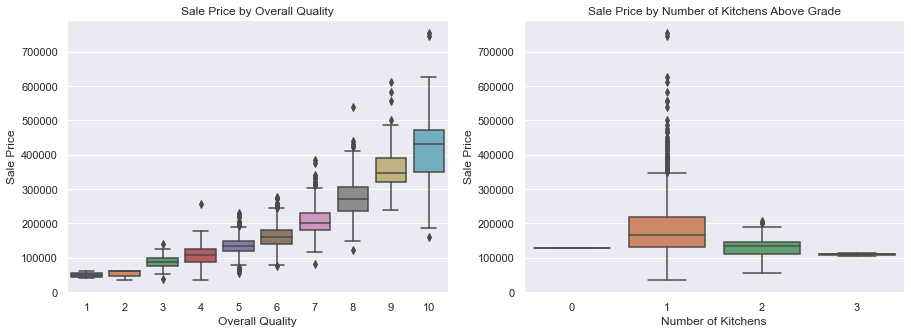

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[feature_w_max_corr_w_SalePrice],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[feature_w_min_corr_w_SalePrice],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('Sale Price by Overall Quality')
ax1.set_xlabel('Overall Quality')
ax1.set_ylabel("Sale Price")
ax2.set_title('Sale Price by Number of Kitchens Above Grade')
ax2.set_xlabel('Number of Kitchens')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

### Features most Correlated with Sale Price

#### Greatest Positive Correlation between Sale Price and Overall Quality

Sale price is most *positively* correlated with the **overall quality** rating of the house, described as a rating of the "overall material and finish" of the house. Perhaps this explains why "upgrades" like installing granite countertops or repainting rooms or the exterior of the house are popular on HGTV shows focused on helping homeowners sell their homes.

##### Notes on Distribution
The distribution of sale price with respect to overall quality resembles an exponential function. In other words, increasing the quality rating of your home from 9 to 10 generally results in a larger increase in sale price than increasing the quality rating of your home from 3 to 4 does.

##### Recommendation
I would strongly recommending looking into investing in these "finishing touches" on your home before selling, especially if your home already has a quality rating of 7 or higher.

##### Possible further analysis
You could estimate the current "overall quality" rating of your home, determine the price of upgrades that are needed to bump your quality rating up to the next bracket, and compare the mean, median or 25th percentile of the two brackets to ensure that your profit will be positive and significant enough to justify the effort. (In fact, you could include time in your cost calculation, if desired.) The mean is not included in the graphics above, but could be determined and used as a comparison. Could we create a tool or service that helps homeowners to do this? Would it be valuable enough to justify the effort?

#### Greatest Negative Correlation between Sale Price and Number of Kitchens Above Grade

Sales price is most *negatively* correlated with the **number of kitchens above grade**.

##### Notes on Distribution
Most houses seem to have 1 or 2 kitchens, and having 2 kitchens rather than 1 appears to decrease your sale price by a potentially significant amount, especially if your sale price lands in the \\$150,000 or above range.

##### Recommendation
Nevertheless, the correlation ($\approx-$0.14) with sale price is still rather "low" in terms of the magnitude of its effect, so I would not be overly concerned if you have 2 or more kitchens in your home.

##### Possible further analysis
Possible further analysis: I would want to explore the reason that number of kitchens affects sales price more before offering additional advice, but I suspect that this correlation may have to do with a poor design of the home layout rather than a dislike of kitchens; if this is the issue, then removing the kitchen may not affect the sale price significantly unless you can do so in a way that fixes poor design.

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [93]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

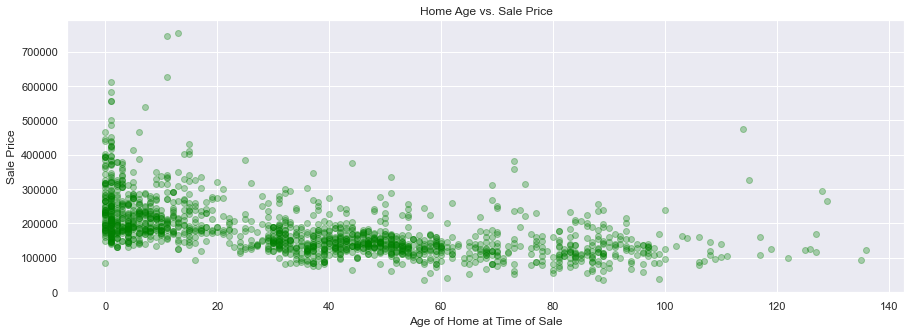

In [94]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [95]:
# Replace None with appropriate text
"""
There is a slight negative correlation between the age of the home and its sale price. The houses that sold for the highest
prices were less than 20 years old, and there are fewer homes being sold which are more than 60 years old. It also appears
that houses that are more than 20 years old are sold for less, on average, than homes that are less than 20 years
old. There are more "young" homes sold for more than $200,000 than "old homes" sold for more than $200,000.
"""

'\nThere is a slight negative correlation between the age of the home and its sale price. The houses that sold for the highest\nprices were less than 20 years old, and there are fewer homes being sold which are more than 60 years old. It also appears\nthat houses that are more than 20 years old are sold for less, on average, than homes that are less than 20 years\nold. There are more "young" homes sold for more than $200,000 than "old homes" sold for more than $200,000.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.